## Plane wave interference

In this notebook we visualise the interference pattern between two or three waves with planar wave fronts.

The Jupyter Notebook is PlaneWavesN.ipynb see

https://github.com/opticsf2f/Opticsf2f_CodeBook

We shall visualise both field and intensity.

<div class="interactive-start" onclick="initInteractiveCode()" title="This runs Python in your browser, allowing you local calculations">CLICK HERE TO ACTIVATE CODE CELLS</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib.colors as colors
from numpy.fft import fft, ifft, fftshift

import matplotlib.colors as colors
import matplotlib.patches as mpatches

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams["text.latex.preamble"]  = r"\usepackage{amsmath} \usepackage{amssymb} \usepackage[bitstream-charter]{mathdesign}"
mpl.rcParams["text.usetex"] = True

The next cell defines the extent of our plot. Units are $\lambda$ so spatial extent is $6\lambda\times 6\lambda$.

dz and dy define the resolution also in units of $\lambda$.

In [2]:
zmin = 0 # z is the horizontal axis so like x in cartesian system
zmax = 6
ymin = -zmax/2   # vertical axis coould be x or y, call it y to agree with standard axes
ymax = zmax/2
dz = 0.025
dy = 0.025
zoom = 1
Z, Y = np.mgrid[zmin/zoom:zmax/zoom:dz/zoom,ymin/zoom:ymax/zoom:dy/zoom]
z_pts, y_pts = np.shape(Z)

Below we define three plane waves, E1, E2, and E3 propagating at $+\theta$, $0$ and $-\Theta$ relative to the $z$ axis.

The two functions return the RGB data to make an image, firstly for field and second for intensity.

In [3]:
def RGB_data1(Theta,field):
    R = np.zeros((z_pts,y_pts))
    G = np.zeros((z_pts,y_pts))
    B = np.zeros((z_pts,y_pts))

    E1 = np.exp(2.0j*np.pi*(np.sin(Theta)*Y+np.cos(Theta)*Z))
    E2 = np.exp(2.0j*np.pi*(np.sin(-Theta)*Y+np.cos(-Theta)*Z))
    E3 = np.exp(2.0j*np.pi*(np.sin(-0*Theta)*Y+np.cos(-0*Theta)*Z))
    
    E = E1 + E2 
    if field == 0:
        R -=  0.4*E.real
        B +=  0.4*E.real
    elif field == 1:
        R -=  0.6*E1.real
        B +=  0.6*E1.real
    else:
        R -=  0.6*E2.real
        B +=  0.6*E2.real
    br=1.0
    bg=1.0 
    bb=1.0 

    R=np.clip(br*R,0.0,1.0)
    G=np.clip(bg*G,0.0,1.0)
    B=np.clip(bb*B,0.0,1.0)
    RGB=np.dstack((np.flipud(R.T), np.flipud(G.T), np.flipud(B.T))) # use transpose to swap image axes, flipud to origin at bottom left
    return RGB

def RGB_data2(Theta,EorI):
    R = np.zeros((z_pts,y_pts))
    G = np.zeros((z_pts,y_pts))
    B = np.zeros((z_pts,y_pts))

    E1 = np.exp(2.0j*np.pi*(np.sin(Theta)*Y+np.cos(Theta)*Z))
    E2 = np.exp(2.0j*np.pi*(np.sin(-Theta)*Y+np.cos(-Theta)*Z))
    
    E = E1 + E2
    if EorI == 0:
        R -=  0.4*E.real
        B +=  0.4*E.real
    else:
        G += 0.2*(E.real*E.real + E.imag*E.imag)
    br=1.0
    bg=1.0 
    bb=1.0 

    R=np.clip(br*R,0.0,1.0)
    G=np.clip(bg*G,0.0,1.0)
    B=np.clip(bb*B,0.0,1.0)
    RGB=np.dstack((np.flipud(R.T), np.flipud(G.T), np.flipud(B.T))) # use transpose to swap image axes, flipud to origin at bottom left
    return RGB


The next cell add arrows and text to the image.

In [4]:
def plotting_function(ax_ref1,plot_label,x_axis_label,y_axis_label,x_pts,y_pts):
    fs = 48
    axs[ax_ref1].text(x_pts/20,x_pts/7,plot_label,fontsize = fs, color='white')
    axs[ax_ref1].text(6*x_pts/20, 18.5*x_pts/20,x_axis_label,fontsize = fs, color='white')
    axs[ax_ref1].text(1.5*x_pts/20, 14*x_pts/20,y_axis_label,fontsize = fs, color='white')

    axs[ax_ref1].set_axis_off()
    arrow = mpatches.FancyArrow(1*x_pts/20, 19*x_pts/20, x_pts/4, 0, width=x_pts/256, head_width = x_pts/64, 
                            head_length = x_pts/16, length_includes_head=True, color = 'white')
    axs[ax_ref1].add_patch(arrow)
    arrow = mpatches.FancyArrow(1*x_pts/20, 19*x_pts/20,  0, -x_pts/4, width=x_pts/256, head_width = x_pts/64, 
                            head_length = x_pts/16, length_includes_head=True, color = 'white')
    axs[ax_ref1].add_patch(arrow)

Now we make a series of image showing E1 and E3 together and then their sum.

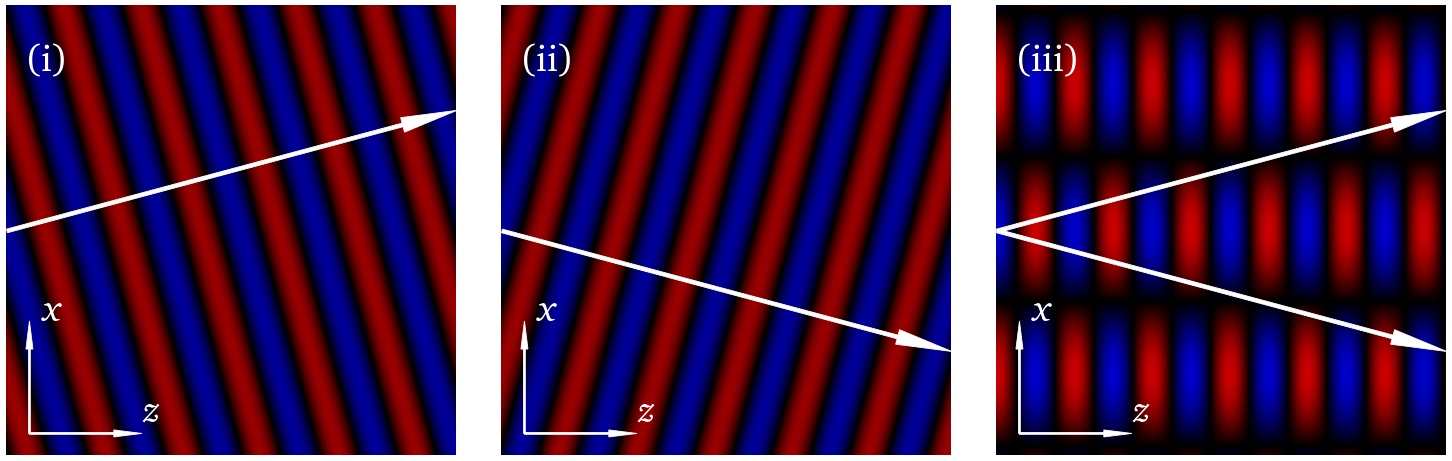

In [5]:
fs = 48

start_time = time.time()

fig, axs = plt.subplots(1,3,figsize=(24, 8),dpi=60)

Theta = 15*np.pi/180
Thetas = [-Theta, Theta]
axs[0].imshow(RGB_data1(Theta,1))
axs[0].set_axis_off()
arrow = mpatches.FancyArrow(0, y_pts/2,  z_pts, -z_pts*np.tan(Theta), width=2, head_width = 8, 
                            head_length = 30, length_includes_head=True, color = 'white')
axs[0].add_patch(arrow)
plotting_function(0,"(i)","$z$","$x$",z_pts,y_pts)   

axs[1].imshow(RGB_data1(Theta,2))
arrow = mpatches.FancyArrow(0, y_pts/2,  z_pts, z_pts*np.tan(Theta), width=2, head_width = 8, 
                                head_length = 30, length_includes_head=True, color = 'white')
axs[1].add_patch(arrow)
axs[1].set_axis_off()
plotting_function(1,"(ii)","$z$","$x$",z_pts,y_pts)   

axs[2].imshow(RGB_data1(Theta,0))
axs[2].set_axis_off()
for Angle in Thetas:
    arrow = mpatches.FancyArrow(0, y_pts/2,  z_pts, z_pts*np.tan(Angle), width=2, head_width = 8, 
                                head_length = 30, length_includes_head=True, color = 'white')
    axs[2].add_patch(arrow)
plotting_function(2,"(iii)","$z$","$x$",z_pts,y_pts)   

plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.0,wspace=0.1,hspace=0.1)

In [6]:
fig.savefig('PlaneWaves2.png',bbox_inches='tight')

In [7]:
def RGB_data1(Theta,field):
    R = np.zeros((z_pts,y_pts))
    G = np.zeros((z_pts,y_pts))
    B = np.zeros((z_pts,y_pts))

    E1 = np.exp(2.0j*np.pi*(np.sin(Theta)*Y+np.cos(Theta)*Z))
    E2 = np.exp(2.0j*np.pi*(np.sin(-Theta)*Y+np.cos(-Theta)*Z))
    E3 = np.exp(2.0j*np.pi*(np.sin(-0*Theta)*Y+np.cos(-0*Theta)*Z))
    
    E = E1 + E2 + E3
    if field == 0:
        R -=  0.4*E.real
        B +=  0.4*E.real
    elif field == 1:
        R -=  0.6*E1.real
        B +=  0.6*E1.real
    else:
        R -=  0.6*E2.real
        B +=  0.6*E2.real
    br=1.0
    bg=1.0 
    bb=1.0 

    R=np.clip(br*R,0.0,1.0)
    G=np.clip(bg*G,0.0,1.0)
    B=np.clip(bb*B,0.0,1.0)
    RGB=np.dstack((np.flipud(R.T), np.flipud(G.T), np.flipud(B.T))) # use transpose to swap image axes, flipud to origin at bottom left
    return RGB

def RGB_data2(Theta,EorI):
    R = np.zeros((z_pts,y_pts))
    G = np.zeros((z_pts,y_pts))
    B = np.zeros((z_pts,y_pts))

    E1 = np.exp(2.0j*np.pi*(np.sin(Theta)*Y+np.cos(Theta)*Z))
    E2 = np.exp(2.0j*np.pi*(np.sin(-Theta)*Y+np.cos(-Theta)*Z))
    E3 = np.exp(2.0j*np.pi*(np.sin(-0*Theta)*Y+np.cos(-0*Theta)*Z))
    
    E = E1 + E2 + E3
    if EorI == 0:
        R -=  0.4*E.real
        B +=  0.4*E.real
    else:
        G += 0.2*(E.real*E.real + E.imag*E.imag)
    br=1.0
    bg=1.0 
    bb=1.0 

    R=np.clip(br*R,0.0,1.0)
    G=np.clip(bg*G,0.0,1.0)
    B=np.clip(bb*B,0.0,1.0)
    RGB=np.dstack((np.flipud(R.T), np.flipud(G.T), np.flipud(B.T))) # use transpose to swap image axes, flipud to origin at bottom left
    return RGB


In the next cell we plot the interference patterns for either field (left column) or intensity (right column)
for increasing angle $\theta$. The values of $\theta$ are defined in line 8. If we change this we 
can have select one, two or three waves.

--- 0.14634299278259277 seconds ---


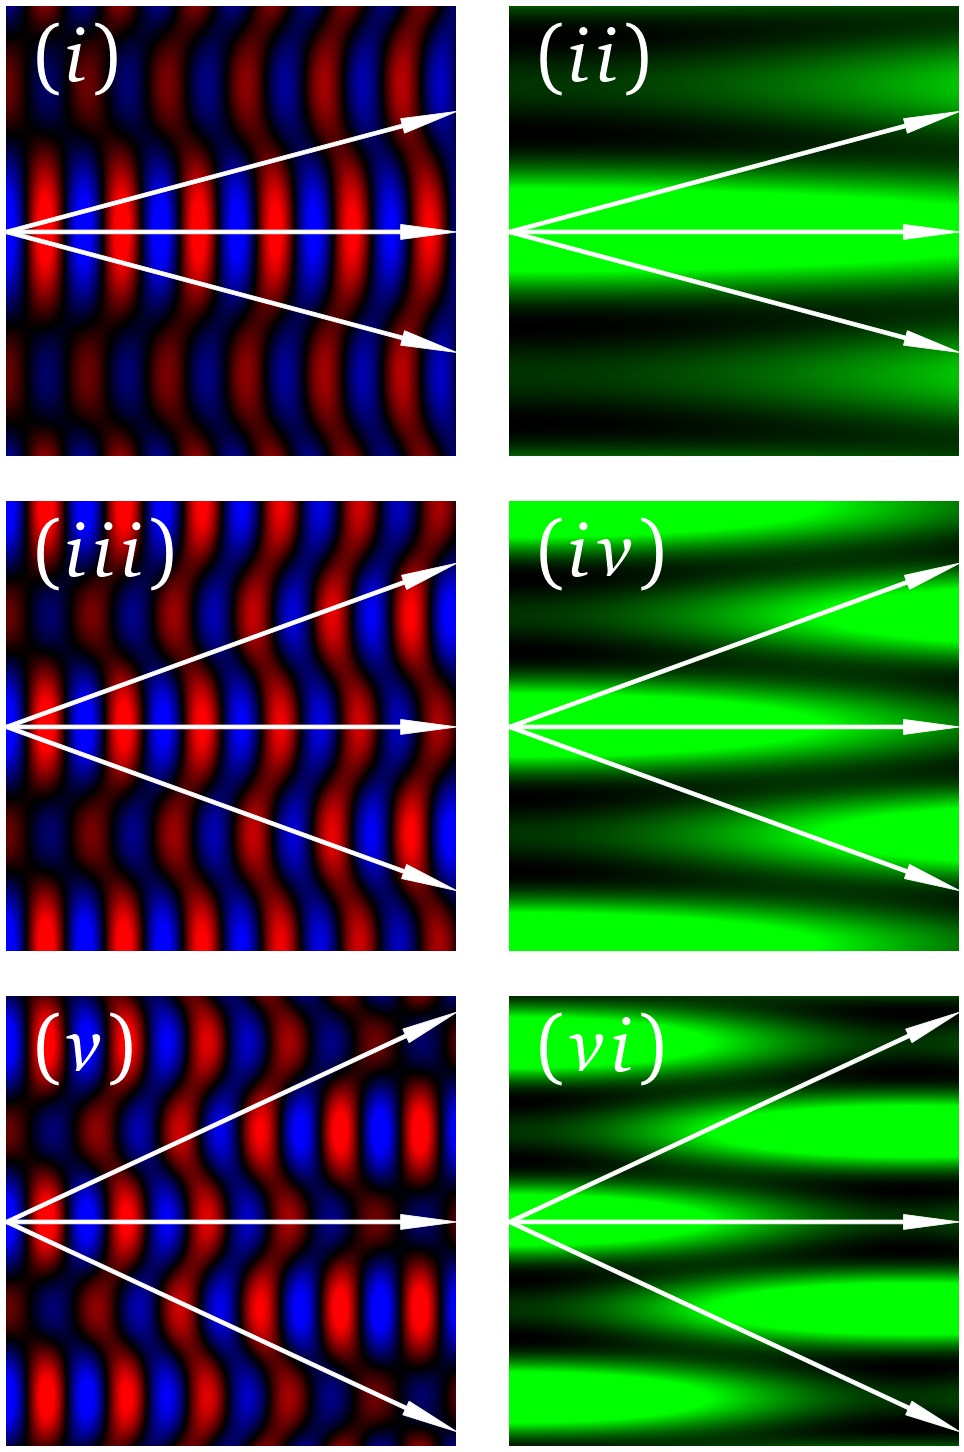

In [8]:
start_time = time.time()

fs = 96

fig, axs = plt.subplots(3,2,figsize=(16, 24),dpi=60)

Theta = 15*np.pi/180
Thetas = [-Theta, 0, Theta]
axs[0,0].imshow(RGB_data2(Theta,0))
axs[0,0].text(z_pts/15,z_pts/6,r'$( i)$',fontsize = fs, color='white')
axs[0,0].set_axis_off()
for Angle in Thetas:
    arrow = mpatches.FancyArrow(0, y_pts/2,  z_pts, z_pts*np.tan(Angle), width=2, head_width = 8, 
                                head_length = 30, length_includes_head=True, color = 'white')
    axs[0,0].add_patch(arrow)

axs[0,1].imshow(RGB_data2(Theta,1))
axs[0,1].text(z_pts/15,z_pts/6,r'$(ii)$',fontsize = fs, color='white')
for Angle in Thetas:
    arrow = mpatches.FancyArrow(0, y_pts/2,  z_pts, z_pts*np.tan(Angle), width=2, head_width = 8, 
                                head_length = 30, length_includes_head=True, color = 'white')
    axs[0,1].add_patch(arrow)
axs[0,1].set_axis_off()

Theta = 20*np.pi/180
Thetas = [-Theta, 0, Theta]
axs[1,0].imshow(RGB_data2(Theta,0))
axs[1,0].text(z_pts/15,z_pts/6,r'$(iii)$',fontsize = fs, color='white')
axs[1,0].set_axis_off()
for Angle in Thetas:
    arrow = mpatches.FancyArrow(0, y_pts/2,  z_pts, z_pts*np.tan(Angle), width=2, head_width = 8, 
                                head_length = 30, length_includes_head=True, color = 'white')
    axs[1,0].add_patch(arrow)

axs[1,1].imshow(RGB_data2(Theta,1))
axs[1,1].text(z_pts/15,z_pts/6,r'$(iv)$',fontsize = fs, color='white')
for Angle in Thetas:
    arrow = mpatches.FancyArrow(0, y_pts/2,  z_pts, z_pts*np.tan(Angle), width=2, head_width = 8, 
                                head_length = 30, length_includes_head=True, color = 'white')
    axs[1,1].add_patch(arrow)
axs[1,1].set_axis_off()


Theta = 25*np.pi/180
Thetas = [-Theta, 0, Theta]
axs[2,0].imshow(RGB_data2(Theta,0))
axs[2,0].text(z_pts/15,z_pts/6,r'$(v)$',fontsize = fs, color='white')
axs[2,0].set_axis_off()
for Angle in Thetas:
    arrow = mpatches.FancyArrow(0, y_pts/2,  z_pts, z_pts*np.tan(Angle), width=2, head_width = 8, 
                                head_length = 30, length_includes_head=True, color = 'white')
    axs[2,0].add_patch(arrow)

axs[2,1].imshow(RGB_data2(Theta,1))
axs[2,1].text(z_pts/15,z_pts/6,r'$(vi)$',fontsize = fs, color='white')
for Angle in Thetas:
    arrow = mpatches.FancyArrow(0, y_pts/2,  z_pts, z_pts*np.tan(Angle), width=2, head_width = 8, 
                                head_length = 30, length_includes_head=True, color = 'white')
    axs[2,1].add_patch(arrow)
axs[2,1].set_axis_off()

plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.0,wspace=0.1,hspace=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

In [9]:
fig.savefig('PlaneWaves3+.png',bbox_inches='tight')